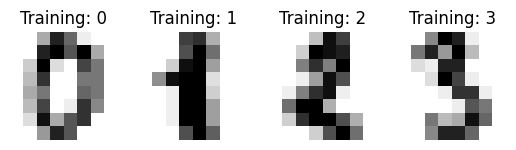

--------------------------------------------------
Sơ đồ 4 mẫu dữ liệu đầu tiên đã được hiển thị.
Nguyễn Đình Vương - 6351071081



In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# %matplotlib inline
digits = datasets.load_digits()
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))

for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()

    # Hiển thị ảnh (dùng màu xám đảo ngược 'gray_r' và nội suy 'nearest' cho rõ nét)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

    # Thiết lập tiêu đề là nhãn thực tế
    ax.set_title(f'Training: {label}')

plt.show() # Hiển thị hình vẽ

print("-" * 50)
print("Sơ đồ 4 mẫu dữ liệu đầu tiên đã được hiển thị.")
print("Nguyễn Đình Vương - 6351071081\n")

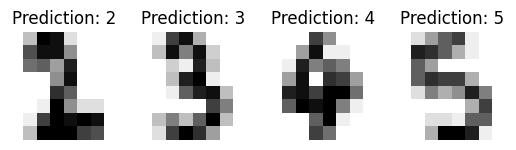


--- Báo cáo Phân loại (Classification Report) ---
Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360


Nguyễn Đình Vương - 6351071081



In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
import numpy as np
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False, random_state=33
)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples - X_test.shape[0]:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

plt.show()

print("\n--- Báo cáo Phân loại (Classification Report) ---")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
print("Nguyễn Đình Vương - 6351071081\n")


Nguyễn Đình Vương - 6351071081

1. Ảnh 8x8 Grayscale (/content/so1.jpg) sau khi Đảo ngược:


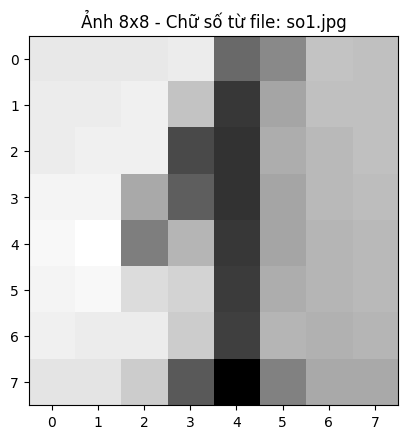


2. Ảnh 8x8 đã làm rõ nét (Sẵn sàng cho mô hình):


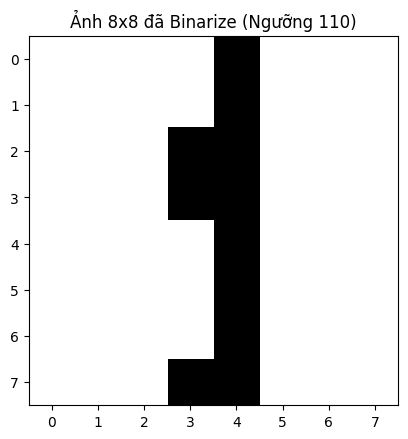

--------------------------------------------------
3. KẾT QUẢ NHẬN DIỆN BẰNG CÂY ID3:
Chữ số được nhận diện là: 1
[1]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, tree
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

# --- 1. TẢI VÀ HUẤN LUYỆN MÔ HÌNH (Tái tạo lại) ---
# Bước này đảm bảo mô hình "classifier" đã sẵn sàng
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False, random_state=33
)
classifier.fit(X_train, y_train)


# =========================================================================
# --- CÁC BƯỚC NHẬN DẠNG CHỮ SỐ TỪ FILE ẢNH MỚI ---

file_path = '/content/so1.jpg'

print("Nguyễn Đình Vương - 6351071081\n")

# 1. Đọc hình (Open, Convert to Grayscale, Resize to 8x8)
try:
    img = Image.open(file_path).convert("L").resize((8, 8))
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {file_path}. Vui lòng kiểm tra lại.")
    exit()

# 2. Đảo ngược ảnh (Invert image)
# Đảo ngược màu để nền trắng và chữ số đen (giống định dạng của bộ dữ liệu digits)
img = ImageOps.invert(img)

# 3. Chuyển đổi sang mảng NumPy
im2arr = np.array(img)

# Hiển thị ảnh sau khi xử lý cơ bản
print(f"1. Ảnh 8x8 Grayscale ({file_path}) sau khi Đảo ngược:")
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Ảnh 8x8 - Chữ số từ file: {file_path.split("/")[-1]}')
plt.show()

# --- 4. LÀM RÕ NÉT ẢNH (Binarization/Normalization) ---
# Chuyển ma trận 8x8 thành vector 1x64
img1d = im2arr.reshape((1, 64))

# Chuẩn hóa (Binarize) ảnh: Đặt ngưỡng để làm rõ nét (VD: Ngưỡng 110)
# Giá trị pixel > 110 (vùng xám/trắng) -> 155 (trắng tuyệt đối)
# Giá trị pixel < 110 (vùng chữ số đen) -> 0 (đen tuyệt đối)
threshold = 110
img1d[img1d > threshold] = 155
img1d[img1d < threshold] = 0

# Hiển thị lại ảnh 8x8 đã làm rõ nét
print("\n2. Ảnh 8x8 đã làm rõ nét (Sẵn sàng cho mô hình):")
plt.imshow(img1d.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Ảnh 8x8 đã Binarize (Ngưỡng {threshold})')
plt.show()
y_pred = classifier.predict(img1d)

print("-" * 50)
print("3. KẾT QUẢ NHẬN DIỆN BẰNG CÂY ID3:")
print(f"Chữ số được nhận diện là: {y_pred[0]}")
print(y_pred)